### Importación de datos



In [45]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [46]:
tienda.isnull().sum()

Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat                       0
lon                       0
dtype: int64

In [47]:
tienda.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [48]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


<Axes: ylabel='Categoría del Producto'>

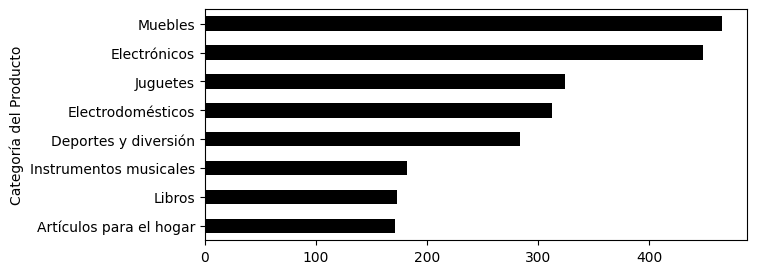

In [49]:
tienda['Categoría del Producto'].value_counts().sort_values().plot(kind='barh', figsize=(7,3), color='black')


In [50]:
tienda.groupby('Categoría del Producto').mean(numeric_only=True)

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
Categoría del Producto,,,,,,
Artículos para el hogar,7.425965e+04,3764.912281,3.748538,2.859649,5.668980,-74.760683
Deportes y diversión,1.383451e+05,7468.661972,3.897887,2.802817,5.189375,-74.813845
Electrodomésticos,1.165658e+06,61935.897436,4.032051,2.903846,5.154013,-74.755243
Electrónicos,9.586908e+05,51258.258929,4.004464,2.993304,5.470447,-74.877900
Instrumentos musicales,5.016429e+05,26834.615385,4.049451,3.148352,5.421133,-74.674466
Juguetes,5.554228e+04,3023.148148,4.077160,2.691358,5.325378,-74.808563
Libros,5.077977e+04,2699.421965,3.976879,3.005780,5.539930,-74.756446
Muebles,4.035133e+05,21494.408602,3.946237,3.109677,5.342442,-74.766665


<Axes: ylabel='Categoría del Producto'>

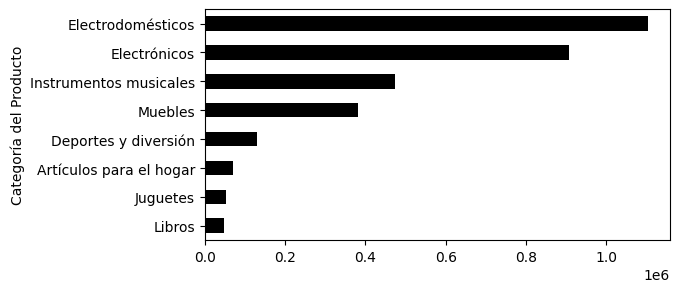

In [51]:
ganancias=tienda
ganancias['ganancia']=ganancias['Precio']-ganancias['Costo de envío']
ganancias.groupby('Categoría del Producto')['ganancia'].mean().sort_values().plot(kind='barh',figsize=(6,3), color='black')

In [52]:
tienda.groupby('Lugar de Compra').mean(numeric_only=True)

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon,ganancia
Lugar de Compra,,,,,,,
Armenia,329692.857143,17314.285714,3.357143,3.000000,4.53389,-75.68111,312378.571429
Barranquilla,438769.333333,23708.000000,3.573333,3.560000,10.96854,-74.78132,415061.333333
Bogotá,447159.552846,23815.853659,4.089431,2.706301,4.60971,-74.08175,423343.699187
Bucaramanga,567070.967742,30587.096774,4.387097,3.903226,7.12539,-73.11980,536483.870968
Cali,545914.134276,28827.561837,3.985866,2.908127,3.43722,-76.52250,517086.572438
Cartagena,420692.452830,22624.528302,4.037736,3.037736,10.39972,-75.51444,398067.924528
Cúcuta,742735.294118,40129.411765,3.882353,3.392157,7.89391,-72.50782,702605.882353
Inírida,544500.000000,28460.000000,4.000000,4.800000,3.86530,-67.92390,516040.000000
Leticia,458431.250000,24450.000000,4.156250,2.718750,-4.21528,-69.94056,433981.250000


In [53]:
tienda.groupby('Método de pago').mean(numeric_only=True)

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon,ganancia
Método de pago,,,,,,,
Cupón,467923.357664,25107.299270,3.722628,1.000000,5.536577,-74.910013,442816.058394
Nequi,481593.581781,25557.971014,4.097308,1.000000,5.132357,-74.768450,456035.610766
Tarjeta de crédito,493348.474178,26314.084507,3.958920,3.690141,5.423824,-74.792059,467034.389671
Tarjeta de débito,385697.142857,21557.142857,4.171429,1.000000,5.059040,-74.478096,364140.000000


In [54]:
ingresos=np.zeros(4)
ingresos[0]=tienda['Precio'].sum()
ingresos[1]=tienda2['Precio'].sum()
ingresos[2]=tienda3['Precio'].sum()
ingresos[3]=tienda4['Precio'].sum()

print('Ingresos')
for i in range(0,4):
    print(f'Tienda {i+1}:{ingresos[i]}')

Ingresos
Tienda 1:1150880400.0
Tienda 2:1116343500.0
Tienda 3:1098019600.0
Tienda 4:1038375700.0


# 2. Ventas por categoría

In [55]:
tienda.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ganancia
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0


<Axes: ylabel='Categoría del Producto'>

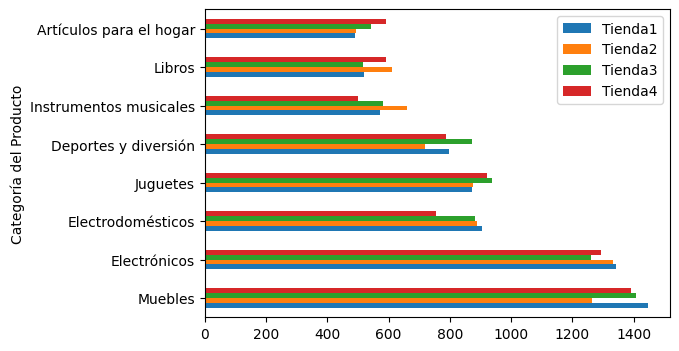

In [77]:
ventas_categoria1=tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame()
ventas_categoria2=tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame()
ventas_categoria3=tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame()
ventas_categoria4=tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame()
ventas_categoria1.columns = ['Tienda1']
ventas_categoria2.columns = ['Tienda2']
ventas_categoria3.columns = ['Tienda3']
ventas_categoria4.columns = ['Tienda4']
ventas_categoria = pd.concat([ventas_categoria1,ventas_categoria2,ventas_categoria3,ventas_categoria4], axis=1)
ventas_categoria.plot(kind='barh',figsize=(6,4))

# 3. Calificación promedio de la tienda


In [186]:
cal = np.zeros(4)
cal[0]=tienda['Calificación'].mean()
cal[1]=tienda2['Calificación'].mean()
cal[2]=tienda3['Calificación'].mean()
cal[3]=tienda4['Calificación'].mean()

for i in range(0,4):
    print(F'Tienda {i+1}: {cal[i]}')


Tienda 1: 3.976685036032217
Tienda 2: 4.037303942348453
Tienda 3: 4.048325561678677
Tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [123]:
top_ventas1=tienda.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().head(5)
top_ventas2=tienda2.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().head(5)
top_ventas3=tienda3.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().head(5)
top_ventas4=tienda4.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().head(5)
top_ventas1.columns=['Tienda1']
top_ventas2.columns=['Tienda2']
top_ventas3.columns=['Tienda3']
top_ventas4.columns=['Tienda4']

In [124]:
top_ventas1

,Tienda1
Producto,
Secadora de ropa,214
TV LED UHD 4K,196
Mesa de noche,188
Impresora,182
Bicicleta,178


In [125]:
top_ventas2

,Tienda2
Producto,
Iniciando en programación,223
Iphone 15,195
Guitarra acústica,183
Microondas,179
Secadora de ropa,177


In [126]:
top_ventas3

,Tienda3
Producto,
Bicicleta,191
Estufa,182
Juego de mesa,181
Cuerda para saltar,176
Refrigerador,172


In [127]:
top_ventas4

,Tienda4
Producto,
Dashboards con Power BI,196
Cama box,195
Cubertería,183
Cama king,175
Mesa de comedor,166


In [128]:
less_ventas1=tienda.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().tail(5)
less_ventas2=tienda2.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().tail(5)
less_ventas3=tienda3.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().tail(5)
less_ventas4=tienda4.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).to_frame().tail(5)
less_ventas1.columns=['Tienda1']
less_ventas2.columns=['Tienda2']
less_ventas3.columns=['Tienda3']
less_ventas4.columns=['Tienda4']

In [129]:
less_ventas1

,Tienda1
Producto,
Cuerda para saltar,100
Tablet ABXY,99
Dinosaurio Rex,94
Mochila,90
Celular ABXY,78


In [130]:
less_ventas2

,Tienda2
Producto,
Sillón,100
Juego de mesa,99
Set de vasos,98
Bicicleta,98
Mesa de comedor,89


In [131]:
less_ventas3

,Tienda3
Producto,
Vaso térmico,109
Microondas,106
Guitarra eléctrica,100
Smartwatch,100
TV LED UHD 4K,94


In [132]:
less_ventas4

,Tienda4
Producto,
Guitarra acústica,104
Tablet ABXY,100
Guitarra eléctrica,97
Smartwatch,93
Armario,88


# 5. Envío promedio por tienda

In [133]:
tienda.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ganancia
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0


In [170]:
m1=tienda.groupby('Categoría del Producto')['Costo de envío'].mean().to_frame()
m2=tienda2.groupby('Categoría del Producto')['Costo de envío'].mean().to_frame()
m3=tienda3.groupby('Categoría del Producto')['Costo de envío'].mean().to_frame()
m4=tienda4.groupby('Categoría del Producto')['Costo de envío'].mean().to_frame()
m1.columns=['Tienda1']
m2.columns=['Tienda2']
m3.columns=['Tienda3']
m4.columns=['Tienda4']
m=pd.concat([m1,m2,m3,m4],axis=1)
m

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Artículos para el hogar,3764.912281,4424.309392,4589.830508,4249.253731
Deportes y diversión,7468.661972,6826.545455,6942.599278,6390.252708
Electrodomésticos,61935.897436,60838.032787,62928.776978,59143.700787
Electrónicos,51258.258929,51692.417062,48460.975610,48399.778271
Instrumentos musicales,26834.615385,24811.160714,23213.559322,23258.235294
Juguetes,3023.148148,2835.782748,3306.984127,3291.420118
Libros,2699.421965,2821.319797,2683.243243,2891.443850
Muebles,21494.408602,21348.642534,21611.422846,21323.541667


array([<Axes: ylabel='Tienda1'>, <Axes: ylabel='Tienda2'>,
       <Axes: ylabel='Tienda3'>, <Axes: ylabel='Tienda4'>], dtype=object)

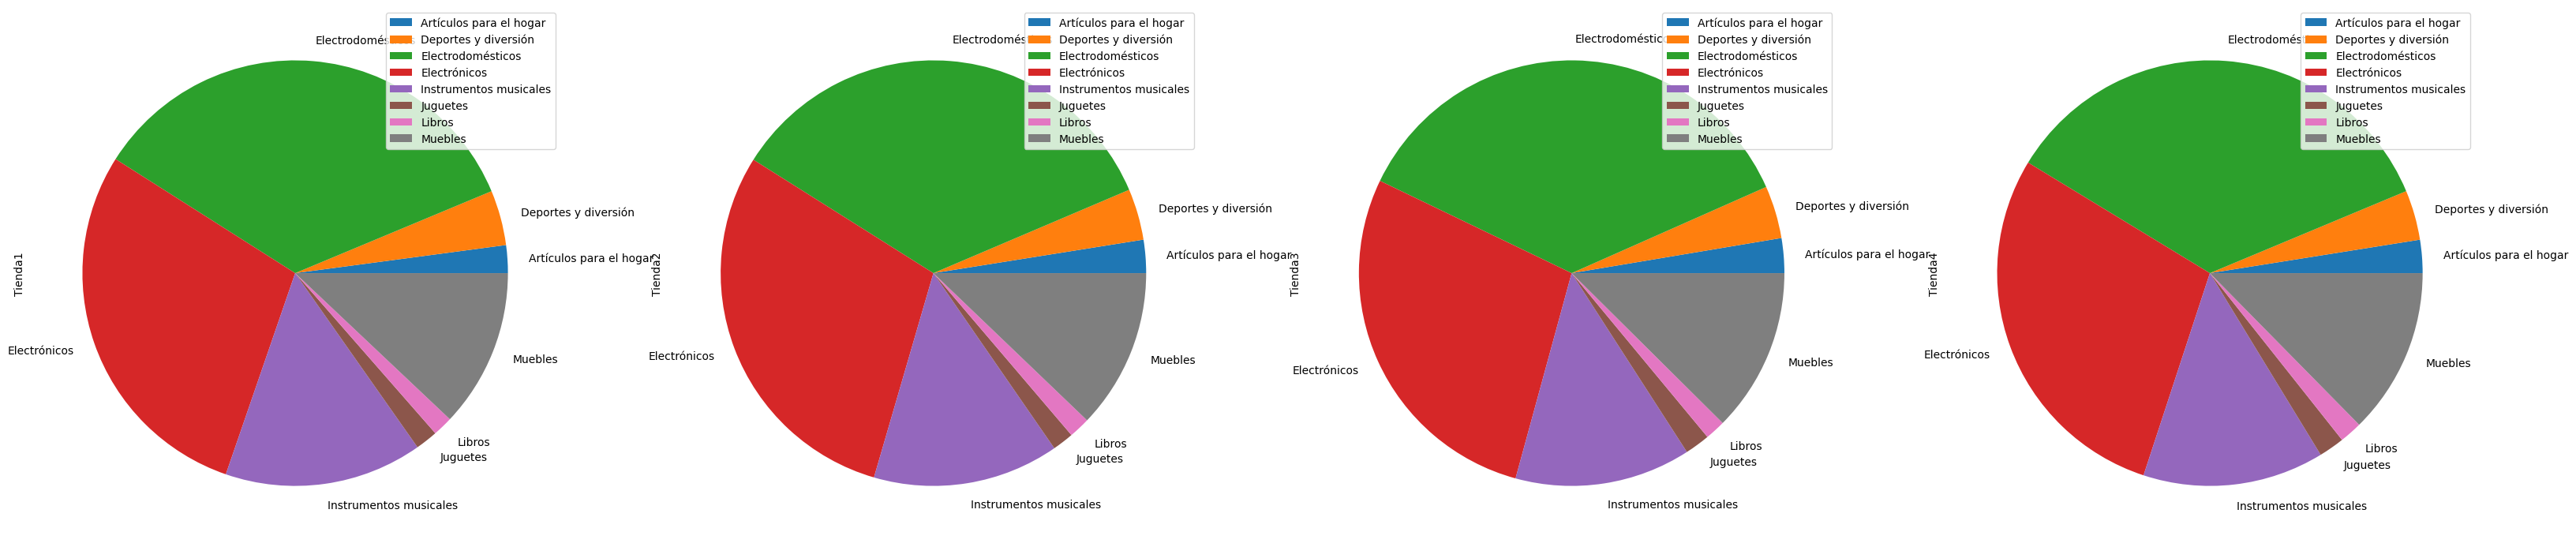

In [182]:
m.plot(kind='pie',subplots=True,figsize=(40,20))

<Axes: >

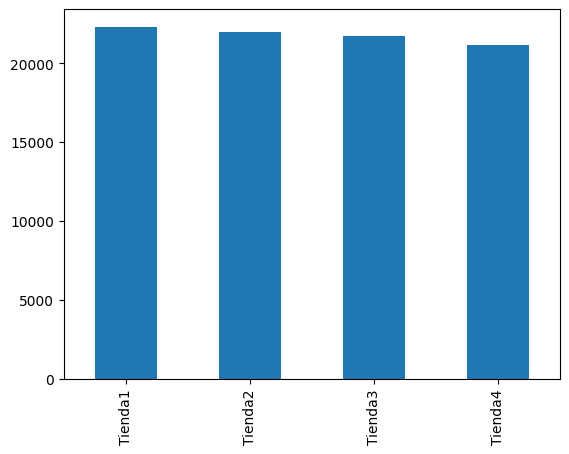

In [176]:
m.mean().plot(kind='bar')

# Informe

### Ingresos Totales
En base a los ingresos de cada tienda la tienda 4 es la que tiene menos ingresos siendo la tienda 1 la que tiene mayores ingresos

### Ventas por categoria
En cuanto a las categorias de los productos, la tienda 4 es la top 1 en ventas en la categoria de Articulos para el hogar. Siendo la unica categoria en la que destaca. Mientras que las demas tiendas destacan en 2 categorias. Cabe destacar que la tienda 1 es la que tiene mas ventas en la categoria con mas ventas en general.

### Calificaciones
Las tiendas en de mayor a menor calificacion son: tienda 2, tienda 3, tienda 4 y tienda 1. Siendo las diferencias minimas, y destacando que la tienda 4 ocupa el penultimo lugar en calificaciones.

### Productos mas y menos vendidos
La tienda 4 tiene en su top de productos vendidos a otros que no tienen otras tiendas y casi no se repiten los top productos vendidos por lo que cada tienda contribuye a la venta de un producto de forma distinta por lo que al vender una tienda perjudicara a las ventas de esos productos.

### Costos de envio
En cuanto a los costos de envio, la tienda 4 es la que tiene menores costos, mientras que la tienda 1 es la que tiene mayores costos de envio, sin embargo esto es inversamente proporcional a los ingresos de las tiendas

### Conclusion
El vender una tienda sin duda perjudicara a los ingresos de la empresa, pero la que producirá menos perdidas al vender seria la tienda 4, cabe aclarar que hay que estar listos en tener buen capital para seguir invirtiendo en los envios y hacer ajustes en la inversion que se hace en los productos de las demas tiendas para compensar la falta de ventas de la tienda 4

# Extra: Caracteristicas demograficas

In [187]:
tienda.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ganancia
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,157400.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,183900.0


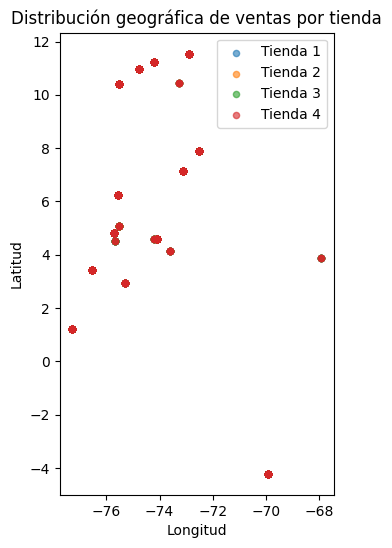

In [252]:
import matplotlib.pyplot as plt

df1=tienda[['lat','lon']].copy()
df2=tienda2[['lat','lon']].copy()
df3=tienda3[['lat','lon']].copy()
df4=tienda4[['lat','lon']].copy()
df1['tienda'] = 'Tienda 1'
df2['tienda'] = 'Tienda 2'
df3['tienda'] = 'Tienda 3'
df4['tienda'] = 'Tienda 4'
df = pd.concat([df1,df2,df3,df4],ignore_index=True)

plt.figure(figsize=(6,6))

for name, group in df.groupby('tienda'):
    plt.scatter(group['lon'], group['lat'], label=name, alpha=0.6, s=20)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Distribución geográfica de ventas por tienda')
plt.show()

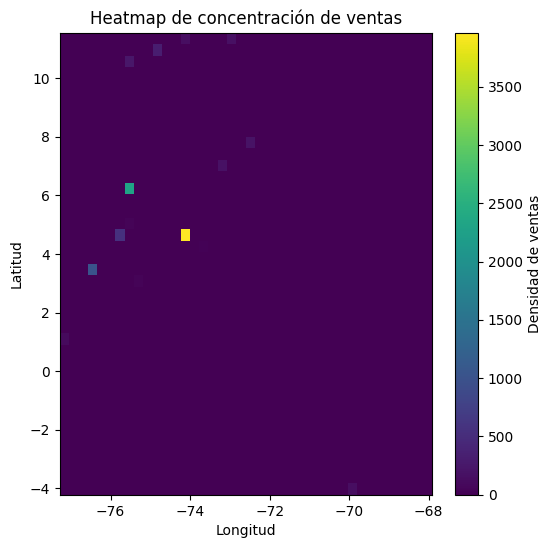

In [253]:
plt.figure(figsize=(6,6))

plt.hist2d(
    df['lon'],
    df['lat'],
    bins=40
)

plt.colorbar(label='Densidad de ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Heatmap de concentración de ventas')
plt.show()

In [256]:
participacion = (
    df.groupby(['region','tienda'])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
)

print(participacion)

region  region  tienda  
Norte   Norte   Tienda 1    0.245597
                Tienda 2    0.255024
                Tienda 3    0.250806
                Tienda 4    0.248574
Sur     Sur     Tienda 1    0.276038
                Tienda 2    0.220685
                Tienda 3    0.245448
                Tienda 4    0.257830
dtype: float64
